# Partie visualisation

## Création du dataframe

In [1]:
import os
import json
import pandas as pd
data = []

for filename in os.listdir("metadata"):
    if filename.endswith(".json"):
        with open(os.path.join("metadata", filename), "r") as f:
            metadata = json.load(f)

        name = metadata.get("name")
        scientific_name = metadata.get("scientific_name")
        family = metadata.get("family")
        location = metadata.get("location")
        width = metadata.get("width")
        height = metadata.get("height")
        format = metadata.get("format")
        mode = metadata.get("mode")
        dominated_colors = metadata.get("dominated_colors")
        dominated_colors_name = metadata.get("dominated_colors_name")
        exif = metadata.get("exif", {})
        make = exif.get("Make")
        model = exif.get("Model")
        orientation = exif.get("Orientation")
        if "exif" in metadata and "DateTime" in metadata["exif"]:
            date_time = metadata['exif']['DateTime'][:4]
        else:
            date_time = None

        data.append({
            "name": name,
            "scientific_name": scientific_name,
            "family": family,
            "location": location,
            "filename": filename,
            "width": width,
            "height": height,
            "format": format,
            "mode": mode,
            "dominated_colors": dominated_colors,
            "dominated_colors_name": dominated_colors_name,
            "make": make,
            "model": model,
            "orientation": orientation,
            "year": date_time
        })

df = pd.DataFrame(data)

df

,name,scientific_name,family,location,filename,width,height,format,mode,dominated_colors,dominated_colors_name,make,model,orientation,year
0,Rhynchotheca,Rhynchotheca,Vivianiaceae,South America,Rhynchotheca%20spinosa.json,757.0,1000.0,PNG,L,[],[],None,None,NaN,None
1,Herbertia,Herbertia,Tigridieae,South America,Herbertia%20lahue.json,1589.0,1590.0,JPEG,RGB,"[#bab8da, #495328]","[lightsteelblue, darkolivegreen]","CASIO COMPUTER CO.,LTD.",EX-Z1080,1.0,2009
2,Cortaderia,Cortaderia,Danthonieae,South America,Cortaderia%20selloana0.json,480.0,640.0,JPEG,RGB,"[#2d3920, #9fa790]","[darkslategrey, darkseagreen]",None,None,NaN,None
3,Tragopogon dubius,Tragopogon dubius,Tragopogon,Switzerland,TragopogonDubiusUtah.json,976.0,1118.0,JPEG,RGB,"[#474019, #b6a746]","[darkolivegreen, darkkhaki]",FUJIFILM,FinePix2600Zoom,1.0,2006
4,Galvezia,Galvezia,Plantaginaceae,South America,Galvezia%20speciosa.json,1169.0,973.0,JPEG,RGB,"[#4a5727, #acbc74]","[darkolivegreen, darkkhaki]",Canon,Canon PowerShot S3 IS,1.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Bison bison,Bison bison,Bison,Canada,American%20bison%20k5680-1.json,2700.0,1761.0,JPEG,RGB,"[#4c4134, #ab996b]","[darkslategrey, darkkhaki]",None,None,NaN,None
523,Luma,Luma,Myrteae,South America,Luma%20apiculata5.json,1704.0,2272.0,JPEG,RGB,"[#27311a, #a6ca5e]","[darkslategrey, darkkhaki]",None,None,NaN,None
524,Corryocactus,Corryocactus,Notocacteae,South America,Corryocactus%20maximus%2001.json,800.0,1088.0,JPEG,RGB,"[#4d3923, #c1885f]","[darkolivegreen, peru]",Canon,Canon EOS 350D DIGITAL,1.0,2007
525,Antonia ovata,Antonia ovata,Antonia,South America,Antonia%20ovata.json,1024.0,768.0,JPEG,RGB,"[#384924, #b8b884]","[darkslategrey, darkkhaki]",SONY,DSC-H5,NaN,2011


## Nombre de photos par année

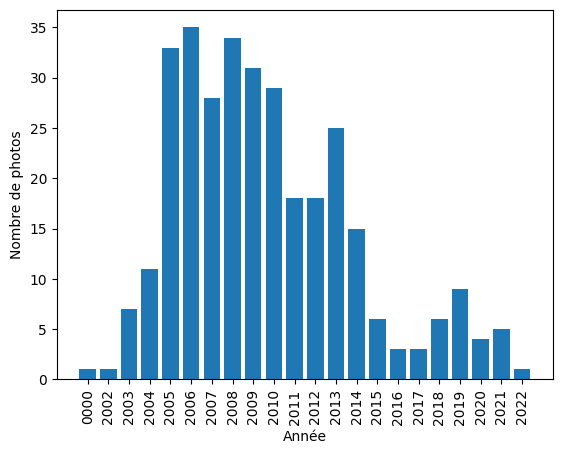

In [2]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

year_counts = df.groupby('year').size()

plot.bar(year_counts.index, year_counts.values)
plot.xlabel('Année')
plot.ylabel('Nombre de photos')
plot.xticks(rotation=90)
plot.show()


## Nombre de photos par année et par marque d'appareil

/home/emdev/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


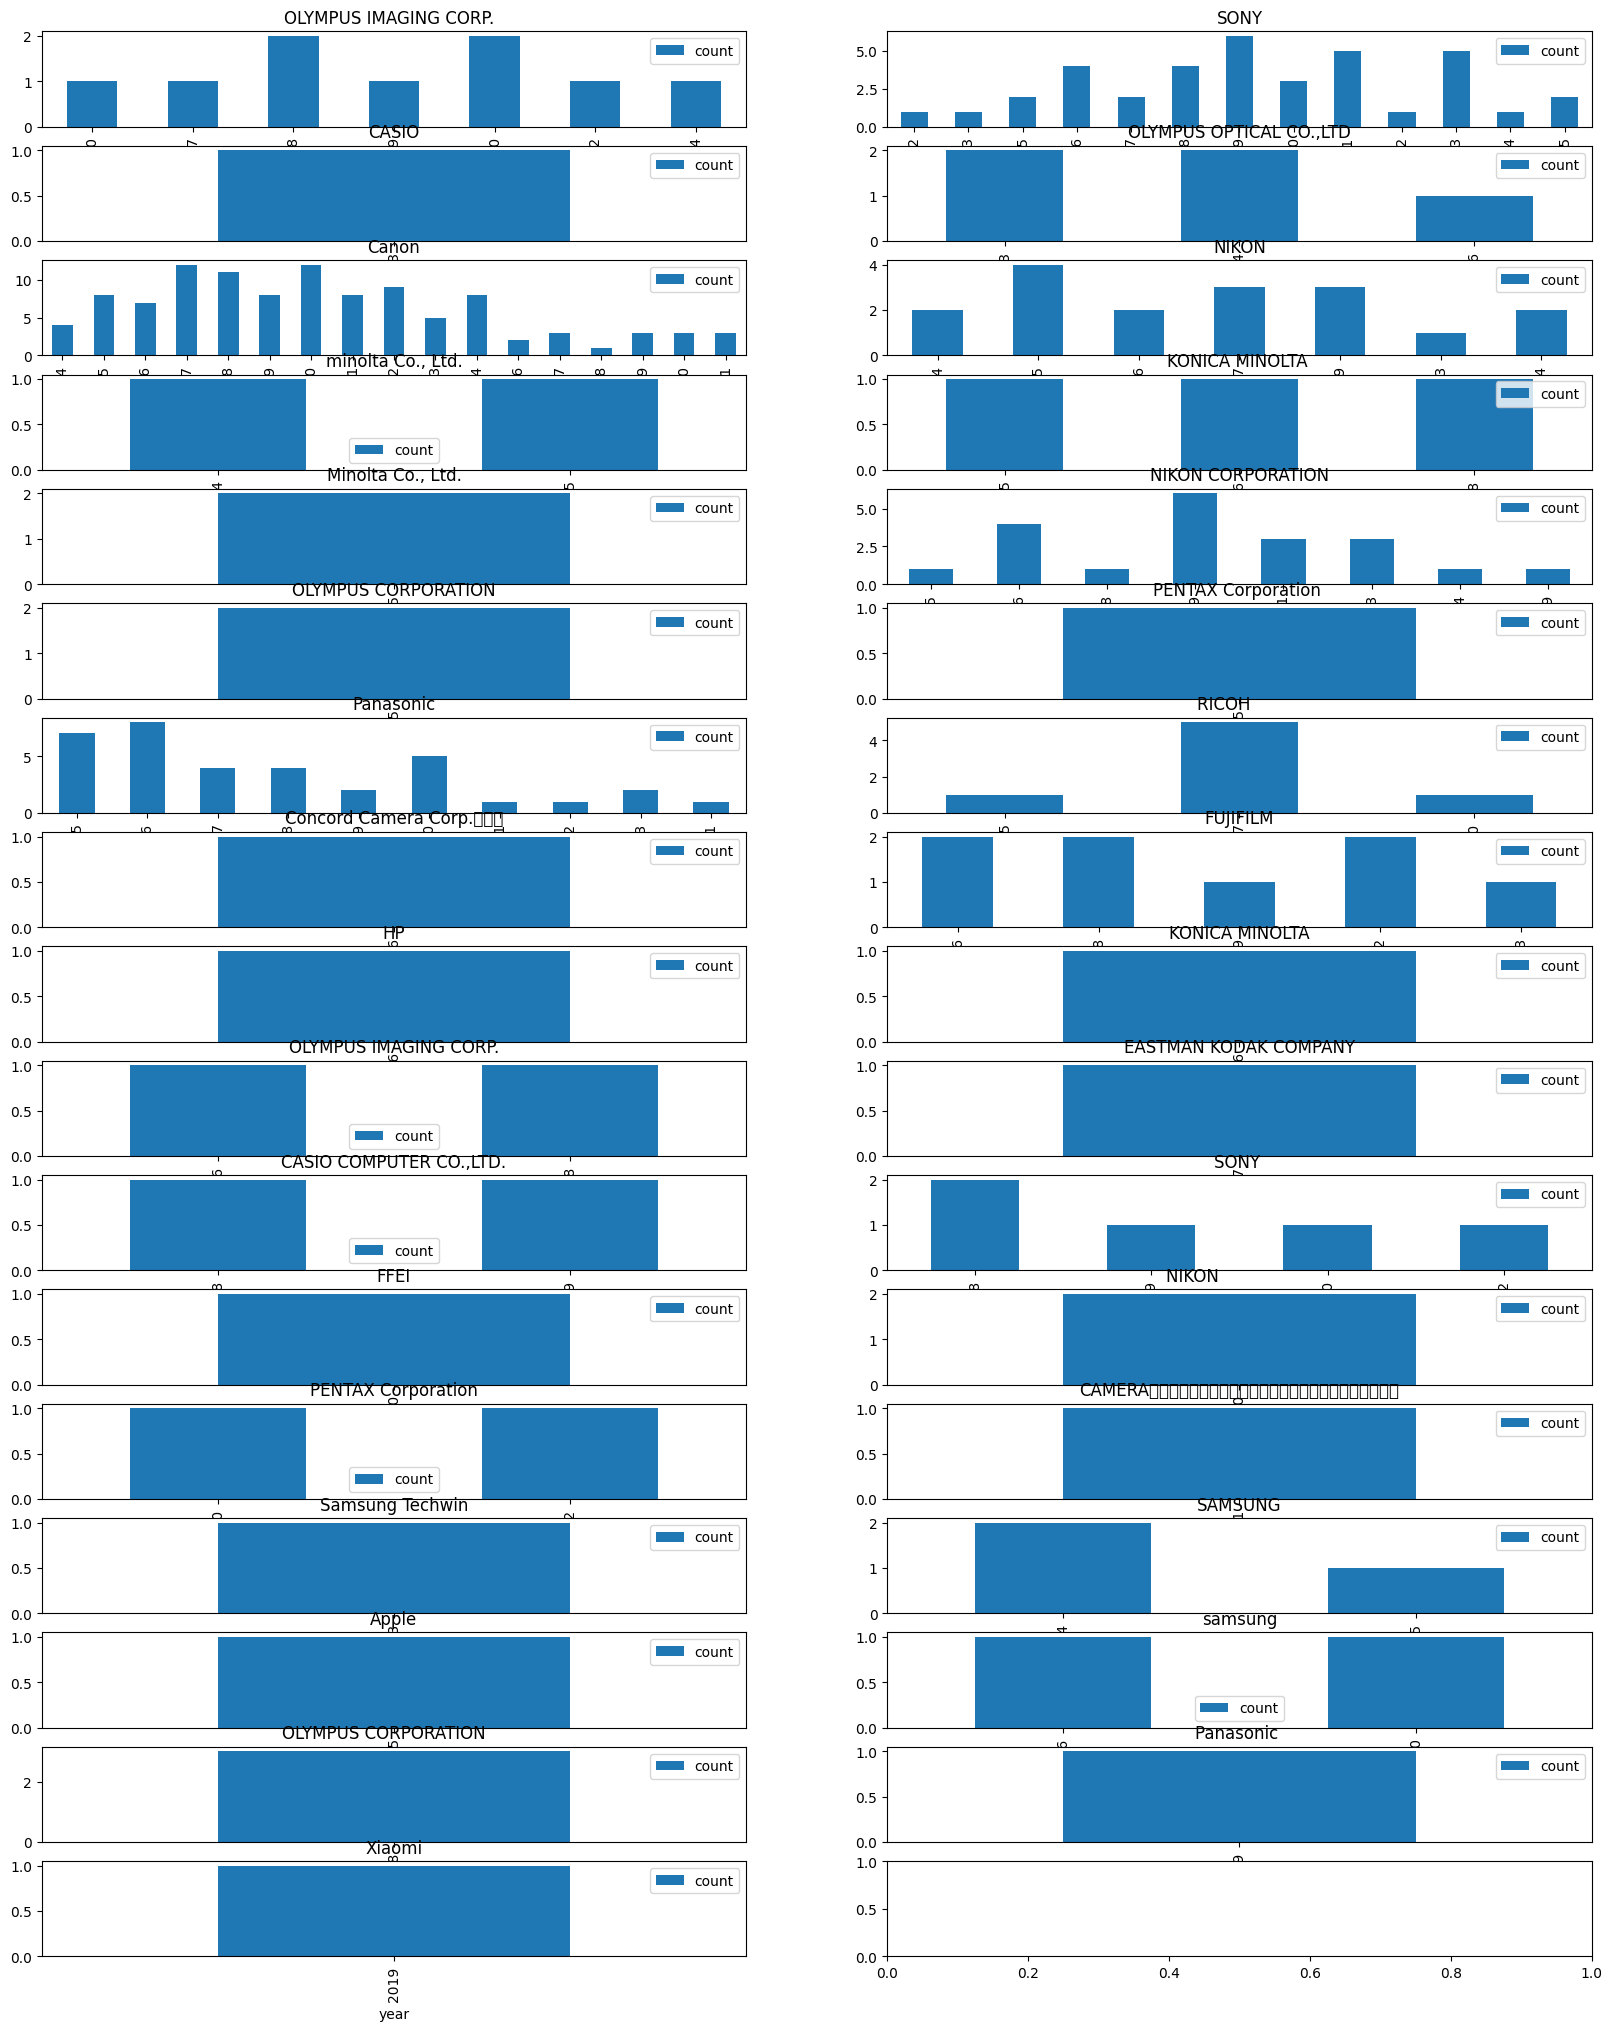

In [3]:
grouped = df.groupby(['year', 'make']).size()

grouped = grouped.reset_index(name='count')

nr = math.ceil(grouped['make'].nunique() / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))

for i, make in enumerate(grouped['make'].unique()):
    g = grouped[grouped['make'] == make]
    g.plot(
        x="year", y="count", kind="bar", title=make, ax=axes[math.floor(i / 2), i % 2]
    )

plot.show()


# Nombre d'images par famille (les 20 plus grandes familles)

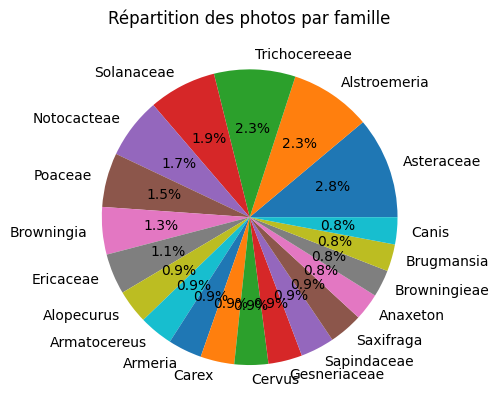

In [4]:
top_families = df.groupby('family').size().nlargest(20)
total_photos = len(df)
plot.pie(top_families.values, labels=top_families.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(top_families.values)/total_photos)))
plot.title('Répartition des photos par famille')
plot.show()


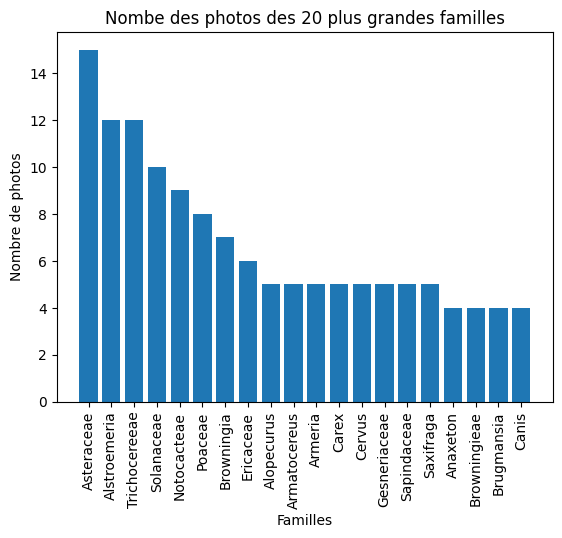

In [5]:
plot.title("Nombe des photos des 20 plus grandes familles")
plot.bar(top_families.index, top_families.values)
plot.xlabel('Familles')
plot.xticks(rotation=90)
plot.ylabel('Nombre de photos')
plot.show()


## Les 10 couleurs les plus présentes 

In [6]:
colors = [color for list_color in df['dominated_colors_name'] if list_color is not None for color in list_color]

color_counts = pd.DataFrame(colors, columns=['color'])

color_counts

,color
0,lightsteelblue
1,darkolivegreen
2,darkslategrey
3,darkseagreen
4,darkolivegreen
...,...
1015,peru
1016,darkslategrey
1017,darkkhaki
1018,dimgrey


color
darkolivegreen    212
darkslategrey     159
darkgrey           73
grey               67
darkkhaki          65
dimgrey            56
darkseagreen       46
silver             45
rosybrown          42
black              40
dtype: int64
1020


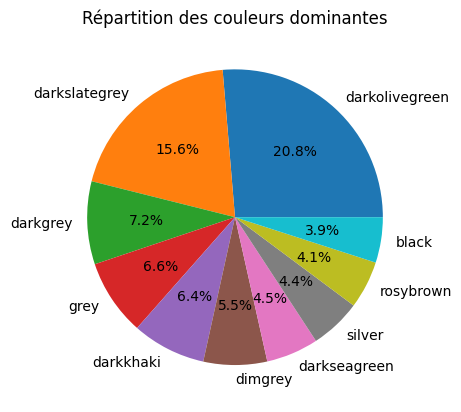

In [7]:
colors_size = color_counts.groupby("color").size().nlargest(10)
total_colors = len(color_counts)
print(colors_size)
print(total_colors)
plot.pie(colors_size.values, labels=colors_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(colors_size.values)/total_colors)))
plot.title('Répartition des couleurs dominantes')
plot.show()

## Le nombre d'images par région géographique

In [8]:
import functools
region_size = df.groupby("location").size()
total_region = functools.reduce(lambda a, b: a+b , region_size)
print(total_region)
print(region_size)

527
location
Africa                       47
Canada                       19
Europe                        6
Greece                        9
Italy                         3
Japan                        35
Lithuania                     3
Poland                        1
Portugal                      1
South America               271
Switzerland                  99
Turkey                        1
United States of America     32
dtype: int64


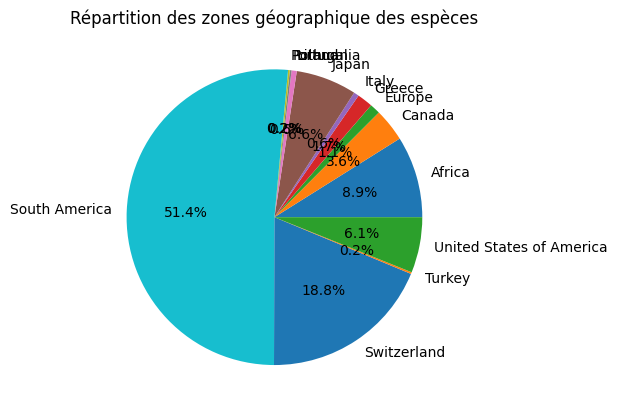

In [9]:
plot.pie(region_size.values, labels=region_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(region_size.values)/total_region)))
plot.title('Répartition des zones géographique des espèces')
plot.show()